### Plot _thornado_ data

Notebook for quick plotting of 2D _thornado_ data. 

---

To Do: Make it easier to select what to plot. Currently: Veyr Manual

In [1]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
import seaborn as sns; sns.set(color_codes=True)
%matplotlib ipympl

In [2]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=28 #18
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 3 #2 
mpl.rcParams['ytick.major.width'] = 3 #2
mpl.rcParams['xtick.minor.width'] = 3 #2 
mpl.rcParams['ytick.minor.width'] = 3 #2
mpl.rcParams['xtick.labelsize']   = 24 # 14
mpl.rcParams['ytick.labelsize']   = 24 #14
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['ytick.right'] = True
# mpl.rcParams['xtick.bottom'] = True
# mpl.rcParams['ytick.left'] = True

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [3]:
simName = "jet"
simType = "nuclear" #Currently: "ideal" or "nuclear"
sim = "cl/100_B1.75_C1.0" #The desired run. clim or cw
sim_cw  = "cw/100_B1.75_C1.0"

#sim_an = "analytic_nNodes1" #Analytic, for comparison
fields = [ 'uAF_P', 'uAF_Ye', 'uPF_V1', 'uCF_D', 'uCF_Ne' ]

dataDir = "../../data/" + simName + "/" + simType + "/" + sim + "/Output"
dataDir_cw = "../../data/" + simName + "/" + simType + "/" + sim_cw + "/Output"
# dataDir_ref = "../../data/" + simName + "/" + simType + "/" + sim_ref 

mb = 1.660539 * pow(10,-24)

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [4]:
fileNumber = "000010" 
fileNumber_cw = "000900"
#For C1.0, compare 000010 with 000900 (t = 0.00255)
fileName_cw = dataDir_cw + '/' + 'Jet_FluidFields_' + fileNumber_cw + '.h5' 
fileName = dataDir + '/' + 'Jet' + '_FluidFields_' + fileNumber + '.h5'

Read the Data

In [5]:
with h5py.File(fileName, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]
    x1 = f['/Spatial Grid/X1'][:]
    x2 = f['/Spatial Grid/X2'][:]
    x3 = f['/Spatial Grid/X3'][:]
    
    uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Cs = f['/Fluid Fields/Auxiliary/Sound Speed'][:]
    
    uPF_V1 = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    uPF_V2 = f['/Fluid Fields/Primitive/Three-Velocity (2)' ][:]
    
    uCF_D = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    uAF_Ye = mb * uCF_Ne / uCF_D
    
    print(time)   

with h5py.File(fileName_cw, 'r') as f:
    for key in f.keys():
        print(key)
    
    time_cw = f['Time'][:]
    x1_cw = f['/Spatial Grid/X1'][:]
    x2_cw = f['/Spatial Grid/X2'][:]
    x3_cw = f['/Spatial Grid/X3'][:]
    
    uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Cs = f['/Fluid Fields/Auxiliary/Sound Speed'][:]
    
    uPF_V1 = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    uPF_V2 = f['/Fluid Fields/Primitive/Three-Velocity (2)' ][:]
    
    uCF_D_cw = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    uAF_Ye = mb * uCF_Ne / uCF_D
    
    print(time_cw)    

Fluid Fields
Shock Detector
Spatial Grid
Time
[0.00225]
Fluid Fields
Shock Detector
Spatial Grid
Time
[0.00225]


Read the desired field into a numpy array.

In [6]:
data_cl = np.zeros( (len(x1), len(x1)) )

print(time)
for i in range(0,len(x1)):
    for j in range(0,len(x2)):
        data_cl[i,j] = uCF_D[0][i][j]

data_cw = np.zeros( (len(x1), len(x1)) )

print(time)
for i in range(0,len(x1)):
    for j in range(0,len(x2)):
        data_cw[i,j] = uCF_D_cw[0][i][j]
              

[0.00225]
[0.00225]


Plot!

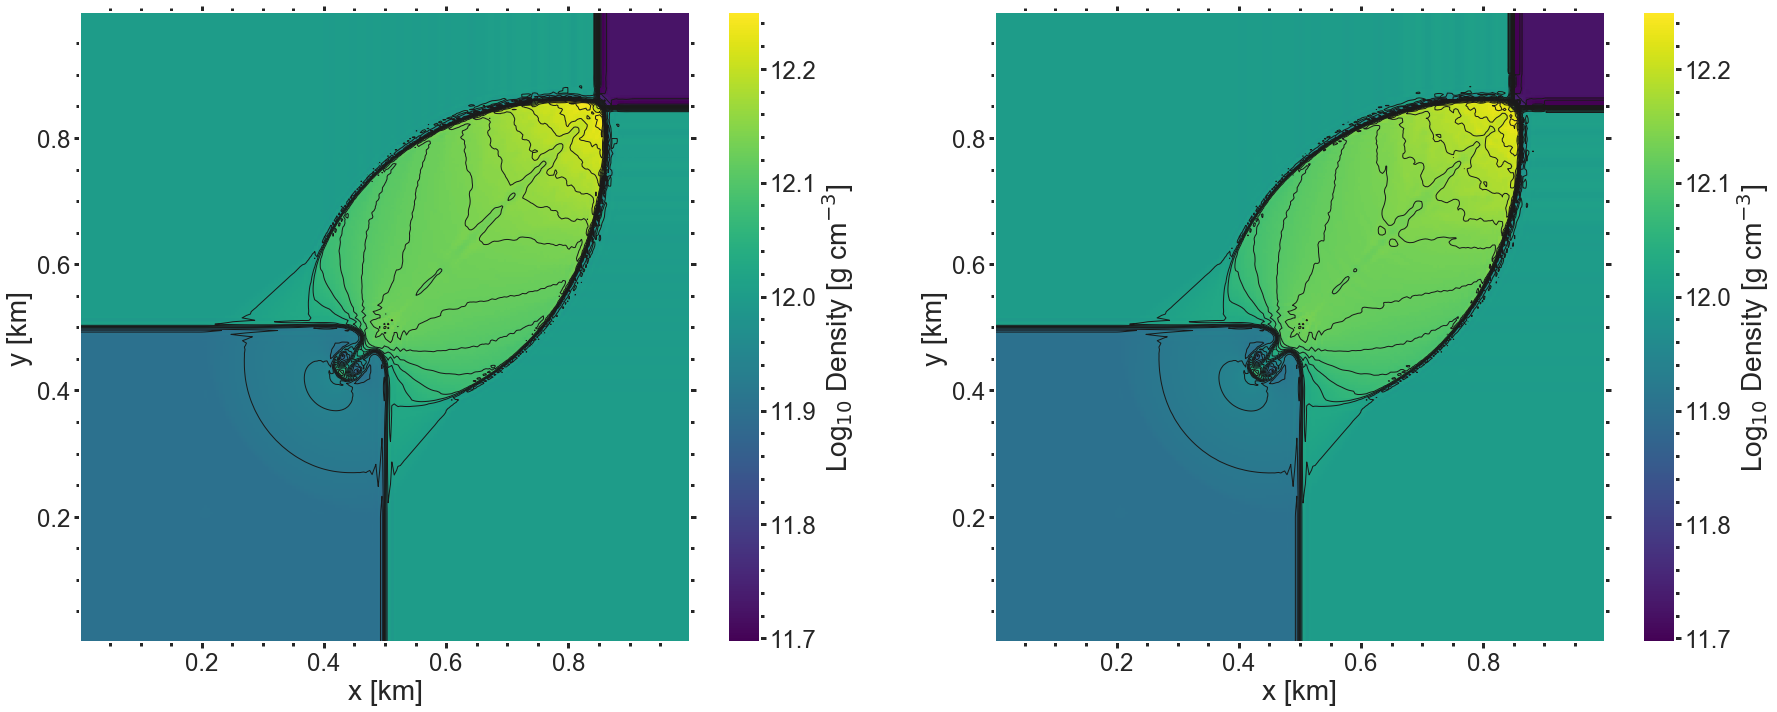

In [7]:
# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('viridis')

dat = {}

dat[0] = data_cl
dat[1] = data_cw

fig, cax = plt.subplots(1,2, sharex=False,sharey=False,figsize=(25,10))



for i in range(2) :
    im = cax[i].pcolormesh(x1, x2, np.log10(dat[i]), cmap=cmap, vmin = np.log10(data_cl).min(), vmax = np.log10(data_cl).max())
    cax[i].set_aspect('auto')
    cax[i].set(xlabel=r'x [km]', ylabel=r"y [km]")
#     cax.set_title("Log Density")
#     plt.gca().set_aspect('equal', adjustable='box')
    level=np.logspace(np.log10(data_cl.min()), np.log10(data_cl.max()), num=31)
    cf = cax[i].contour(x1,
                   x2, dat[i],colors='k', linewidths=1.0,levels=level,
                   )   

    divider = make_axes_locatable(cax[i])
#     cax1 = divider.append_axes("right", size="5%", pad=0.05)
#     fig.colorbar(im, cax=cax1)
    plt.colorbar(im,ax=cax[i],label=r'Log$_{10}$ Density [g cm$^{-3}$]')

#legend
#     cax[i].set_ylabel(r'Log$_{10}$ Density [g cm$^{-3}$]', rotation=270, labelpad=20)

fig.tight_layout()
fig.subplots_adjust(wspace = 0.2)

# plt.show()
# plt.savefig("2d_jet.png", dpi=300)

In [9]:
### FOR INTERACTIVE PLOTTING
# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('viridis')

dat = {}

dat[0] = data_cl
dat[1] = data_cw

fig, cax = plt.subplots(1,2, sharex=False,sharey=False,figsize=(12,5))



for i in range(2) :
    im = cax[i].pcolormesh(x1, x2, np.log10(dat[i]), cmap=cmap, vmin = np.log10(data_cl).min(), vmax = np.log10(data_cl).max())
    cax[i].set_aspect('auto')
    cax[i].set(xlabel=r'x [km]', ylabel=r"y [km]")
#     cax.set_title("Log Density")
#     plt.gca().set_aspect('equal', adjustable='box')
    level=np.logspace(np.log10(data_cl.min()), np.log10(data_cl.max()), num=31)
    cf = cax[i].contour(x1,
                   x2, dat[i],colors='k', linewidths=1.0,levels=level,
                   )   

    divider = make_axes_locatable(cax[i])
#     cax1 = divider.append_axes("right", size="5%", pad=0.05)
#     fig.colorbar(im, cax=cax1)
    plt.colorbar(im,ax=cax[i],label=r'Log$_{10}$ Density [g cm$^{-3}$]')

#legend
#     cax[i].set_ylabel(r'Log$_{10}$ Density [g cm$^{-3}$]', rotation=270, labelpad=20)

fig.tight_layout()
fig.subplots_adjust(wspace = 0.2)

# plt.show()
plt.savefig("2d_jet.png", dpi=300)

FigureCanvasNbAgg()

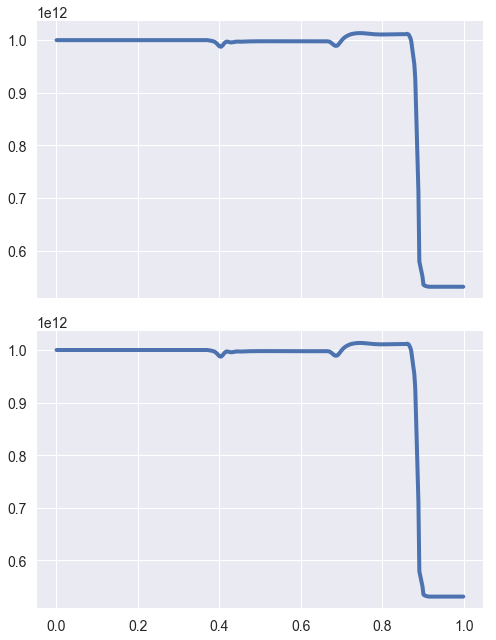

In [9]:
###### make these smaller to increase the resolution
dx, dy = 0.01, 0.01

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-1, 1 , 2/len(data_d)),
                slice(-1, 1 , 2/len(data_d))]

dat = {}
# for i in range(2) :
#     dat[i] = {}
dat[0] = data_v1
dat[1] = data_v2

fig, cax = plt.subplots(2, sharex=True,sharey=True,figsize=(7,9))

cax[0].plot(x2,data_d[299,:])
cax[1].plot(x1,data_d[:,299])
        
fig.tight_layout()

plt.show()


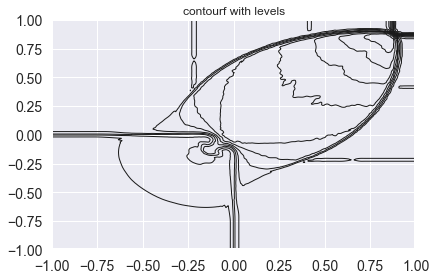

In [48]:
# make these smaller to increase the resolution
dx, dy = 0.001, 0.001
data=data_d
# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-1, 1 , 2/len(data)),
                slice(-1, 1 , 2/len(data))]

level=np.logspace(np.log10(data.min()), np.log10(data.max()), num=20)
#levels = #MaxNLocator(nbins=20).tick_values(np.log10(data.min()), np.log10(data.max()))

fig, ax1 = plt.subplots(1)

# contours are *point* based plots, so convert our bound into point
# centers
# cf = ax1.contour(x,
#                y, data, levels=levels, cmap=cmap
#                )
cf = ax1.contour(x1,
               x2, data,levels=level,colors='k', linewidths=1.0,
               )

#fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

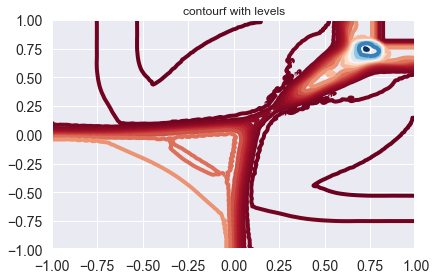

In [41]:
# make these smaller to increase the resolution
dx, dy = 0.001, 0.001
data=data_d
# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-1, 1 , 2/len(data)),
                slice(-1, 1 , 2/len(data))]

cmap = plt.get_cmap('RdBu')
level=np.logspace(np.log10(data.min()), np.log10(data.max()), num=20)
#levels = #MaxNLocator(nbins=20).tick_values(np.log10(data.min()), np.log10(data.max()))

fig, ax1 = plt.subplots(1)


cf = ax1.contour(x1,
               x2, data,cmap=cmap,levels=level,
               )

#fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

In [11]:
np.shape(data_d)

(600, 600)